**IMDB MOVIE RATINGS ANALYSIS**

In [378]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [379]:
imdb_data = pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')

In [380]:
imdb_data.head(4)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"


In [381]:
imdb_data.tail(6)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
994,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964,U,87 min,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,https://m.media-amazon.com/images/M/MV5BMTY5OD...,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [382]:
imdb_data.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [383]:
imdb_data.shape

(1000, 16)

In [384]:
imdb_data.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [385]:
imdb_data['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [386]:
x = imdb_data['Gross'].loc[imdb_data['Gross'] == 0]
print(x)

Series([], Name: Gross, dtype: object)


NO Elements found with 0 in the Gross column so we can replace it with 0

In [387]:
mean = imdb_data['Meta_score'].mean().round(1)
print(mean)

78.0


In [388]:
imdb_data['Meta_score'] = imdb_data['Meta_score'].fillna(mean)

In [389]:
imdb_data['Gross'] = imdb_data['Gross'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
imdb_data['Gross'] = imdb_data['Gross'].apply(lambda x: float(x))
mean = imdb_data['Gross'].mean().round(1)
print(mean)

68034750.9


In [390]:
imdb_data['Gross'] = imdb_data['Gross'].fillna(mean)

In [391]:
imdb_data['Gross']

0       28341469.0
1      134966411.0
2      534858444.0
3       57300000.0
4        4360000.0
          ...     
995     68034750.9
996     68034750.9
997     30500000.0
998     68034750.9
999     68034750.9
Name: Gross, Length: 1000, dtype: float64

In [392]:
mean = imdb_data['Gross'].mean().round(1)
print(mean)

68034750.9


Yeah the missing values in MetaScore and the Gross is replaced....

In [393]:
imdb_data['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [394]:
imdb_data['Certificate'].mode()

0    U
dtype: object

In [395]:
U_count = imdb_data['Certificate'].value_counts()['U']
print(U_count)

234


In [396]:
imdb_data['Certificate'] = imdb_data['Certificate'].fillna(U_count)

In [397]:
imdb_data.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

Now lets drop the uneccesary columns

In [398]:
#imdb_data = imdb_data.drop(['Poster_Link','Series_Title','Overview'],axis=1)

These rows are removed because they are not useful for the analysis

In [399]:
for i in range(len(imdb_data)):
    imdb_data.loc[i, 'Runtime'] = imdb_data.loc[i, 'Runtime'].replace(' min', '')

In [400]:
imdb_data['Runtime']

0      142
1      175
2      152
3      202
4       96
      ... 
995    115
996    201
997    118
998     97
999     86
Name: Runtime, Length: 1000, dtype: object

In [401]:
imdb_data['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

In [402]:
imdb_data['Released_Year'].value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

We can make this row useful if we remove that PG row because it is only the string only

In [403]:
x = imdb_data['Released_Year'].loc[imdb_data['Released_Year'] == 'PG']
print(x)

966    PG
Name: Released_Year, dtype: object


In [404]:
imdb_data = imdb_data.drop(labels=966 , axis=0)

In [405]:
imdb_data['Released_Year'] = imdb_data['Released_Year'].astype(int)

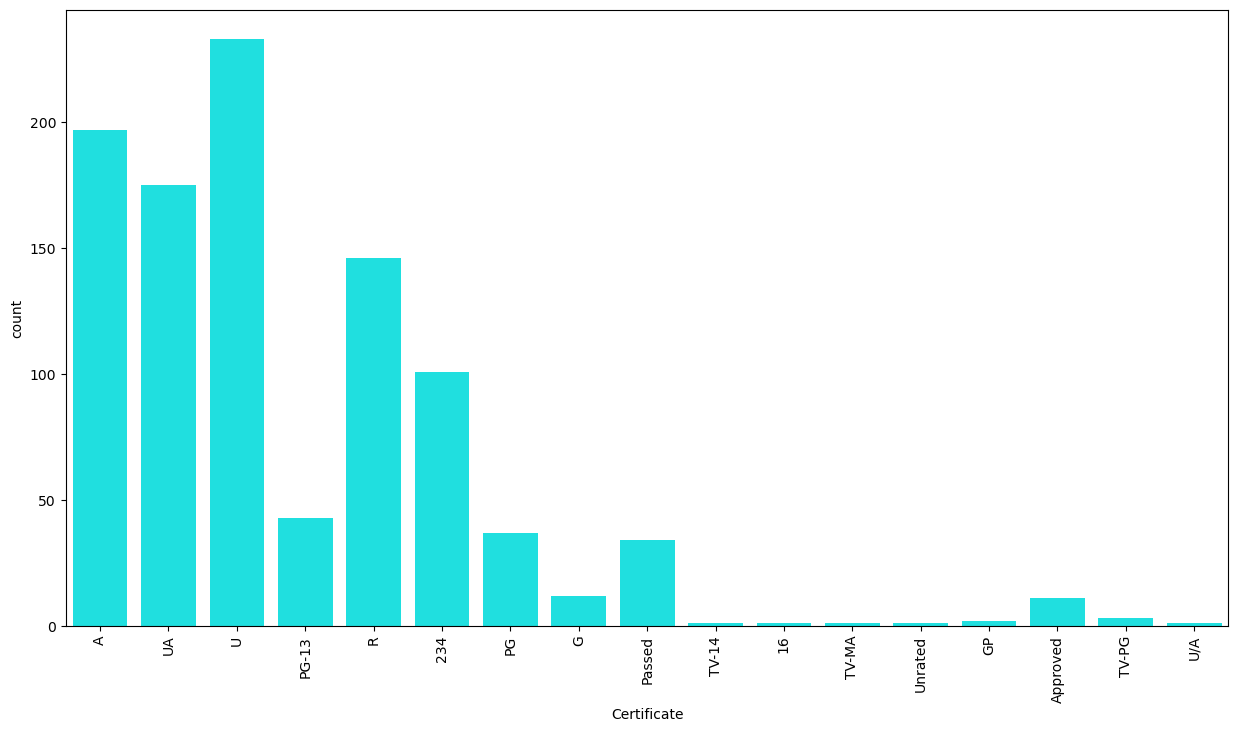

In [406]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Certificate',data=imdb_data,color ='#00FFFF')

plt.xticks(rotation = 90);

The most movies which are of certificate 'U' are rated in top 1000 of imdb might be because the U certificate movies are friendly to all categories of the people(adults,old,children) etc..

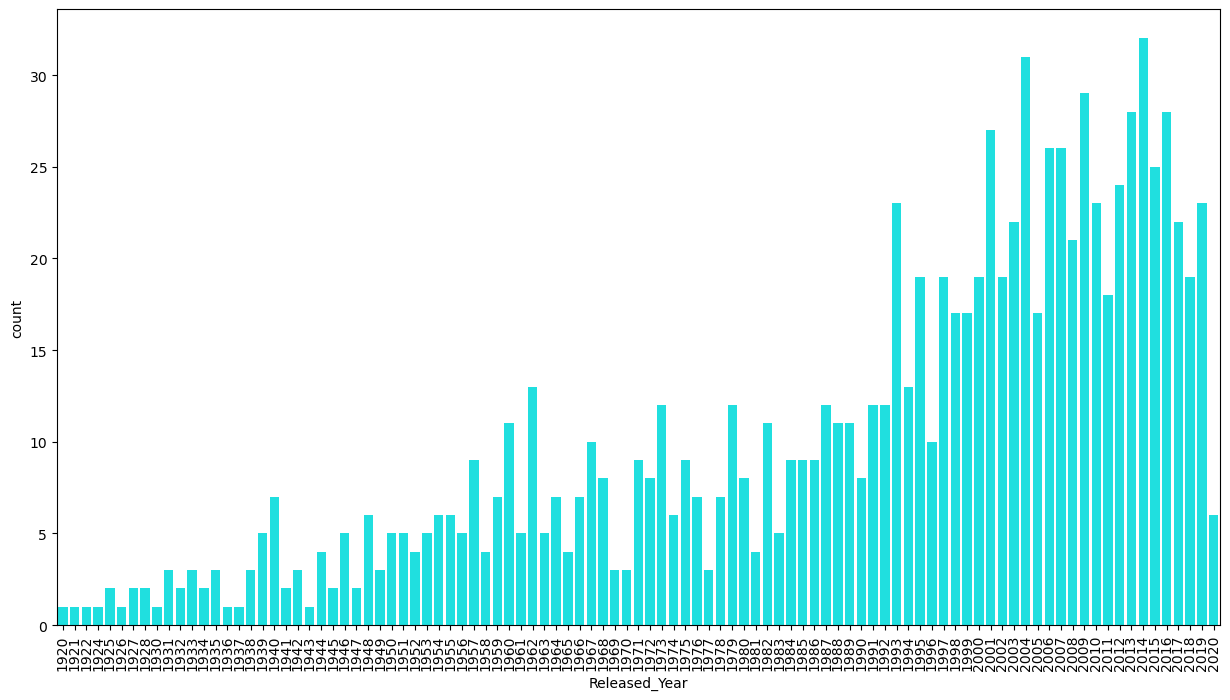

In [407]:
plt.figure(figsize=(15,8))
sns.countplot(x='Released_Year',color = '#00FFFF',data = imdb_data)
plt.xticks(rotation=90);

We can see majorly the movies and tvshows were top 1000 imdb rating movies are mostly got rated in the year after 1956

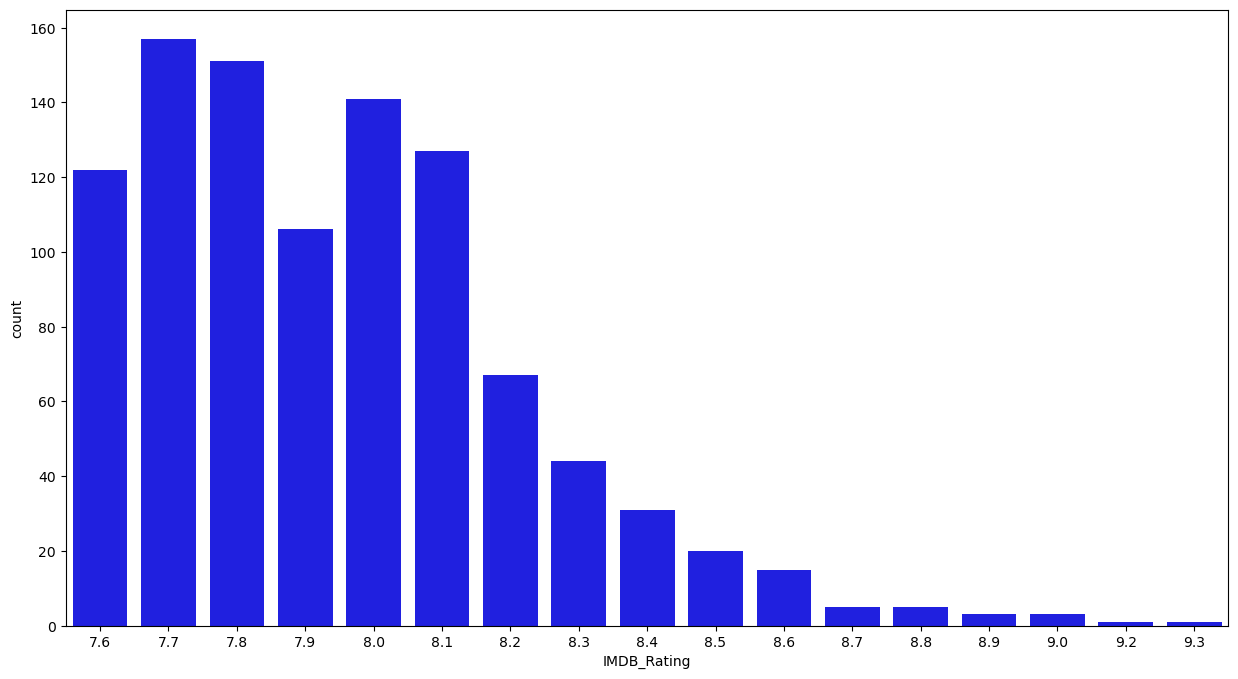

In [408]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'IMDB_Rating',color='#0000FF',data=imdb_data)
plt.show();

In the data we have many movies and tvshows rated less greater than 7.5 and less than 8.3 and highest rated movies are 9.3

In [409]:
top_rates=imdb_data.groupby('Series_Title').mean().sort_values('IMDB_Rating',ascending=False).head(10)
top_rates = top_rates[['IMDB_Rating']].round(2)
top_rates.reset_index(inplace=True)
top_rates

,Series_Title,IMDB_Rating
0,The Shawshank Redemption,9.3
1,The Godfather,9.2
2,12 Angry Men,9.0
3,The Godfather: Part II,9.0
4,The Dark Knight,9.0
5,Pulp Fiction,8.9
6,The Lord of the Rings: The Return of the King,8.9
7,Schindler's List,8.9
8,The Lord of the Rings: The Fellowship of the Ring,8.8
9,Forrest Gump,8.8


THe shawshank Redemption has the imdb rating of 9.3

In [410]:
top_rates = imdb_data.groupby('Genre').mean().sort_values('IMDB_Rating',ascending=False).head(10)
top_rates = top_rates[['IMDB_Rating']].round(2)
top_rates.reset_index(inplace = True)
top_rates

,Genre,IMDB_Rating
0,"Animation, Drama, War",8.50
1,"Drama, Musical",8.40
2,"Action, Sci-Fi",8.40
3,"Drama, Mystery, War",8.35
4,Western,8.35
5,"Crime, Drama, Music",8.30
6,"Mystery, Romance, Thriller",8.30
7,"Adventure, Mystery, Thriller",8.30
8,"Drama, Fantasy, Horror",8.30
9,"Comedy, Musical, Romance",8.30


The "Animation,Drama,War"Genre has the Highest IMDB_rating of 8.50

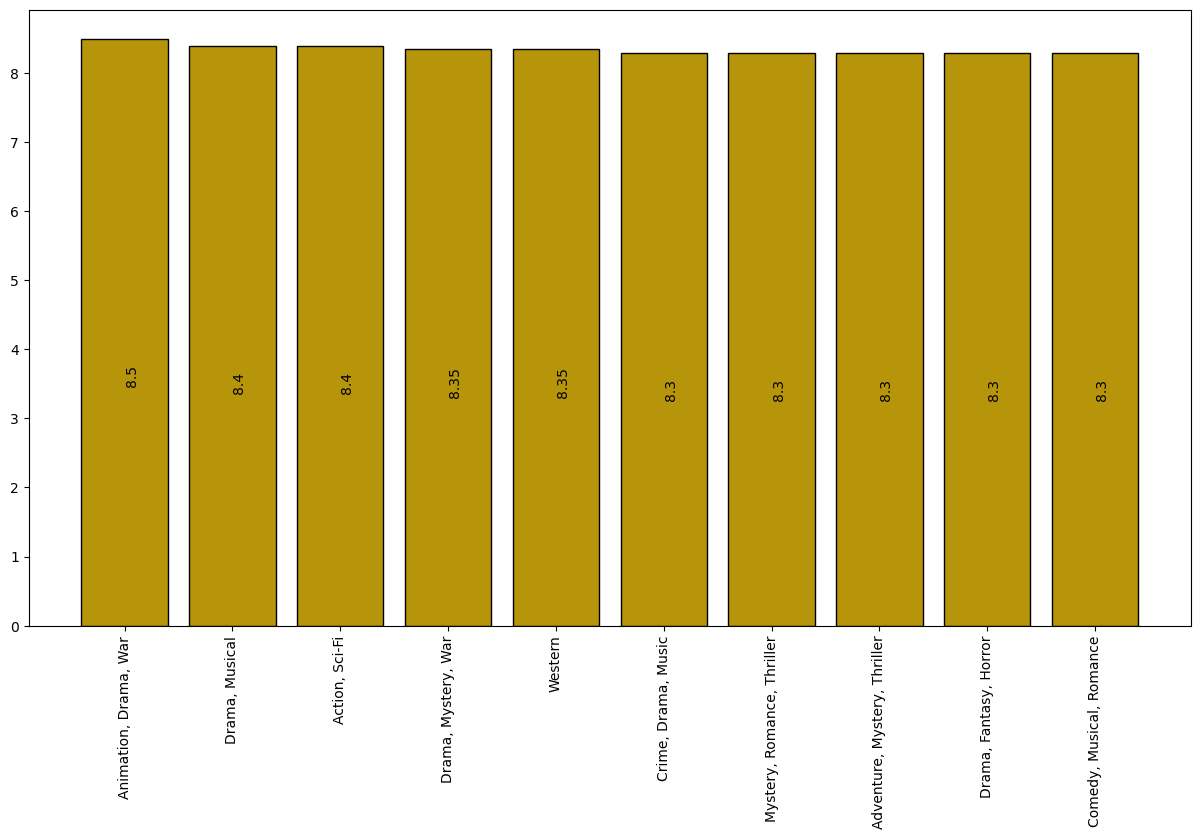

In [411]:
plt.figure(figsize=(15,8))
plt.bar(top_rates['Genre'],top_rates['IMDB_Rating'],color='#B7950B',edgecolor='black' )
plt.xticks(rotation=90)
for k,v in top_rates['IMDB_Rating'].items():
    plt.text(k,v-5,str(v),rotation=90)

In [412]:
top_rates=imdb_data.groupby('Genre').mean().sort_values('Meta_score',ascending=False).head(10)
top_rates = top_rates[['Meta_score']].round(2)
top_rates.reset_index(inplace=True)
top_rates

,Genre,Meta_score
0,"Mystery, Romance, Thriller",100.0
1,"Comedy, Musical, Romance",99.0
2,"Drama, Fantasy, War",98.0
3,"Adventure, Mystery, Thriller",98.0
4,"Comedy, Music, Romance",98.0
5,"Action, Adventure, Romance",97.0
6,"Film-Noir, Mystery, Thriller",97.0
7,"Film-Noir, Mystery",96.0
8,"Animation, Drama, War",94.0
9,"Film-Noir, Thriller",94.0


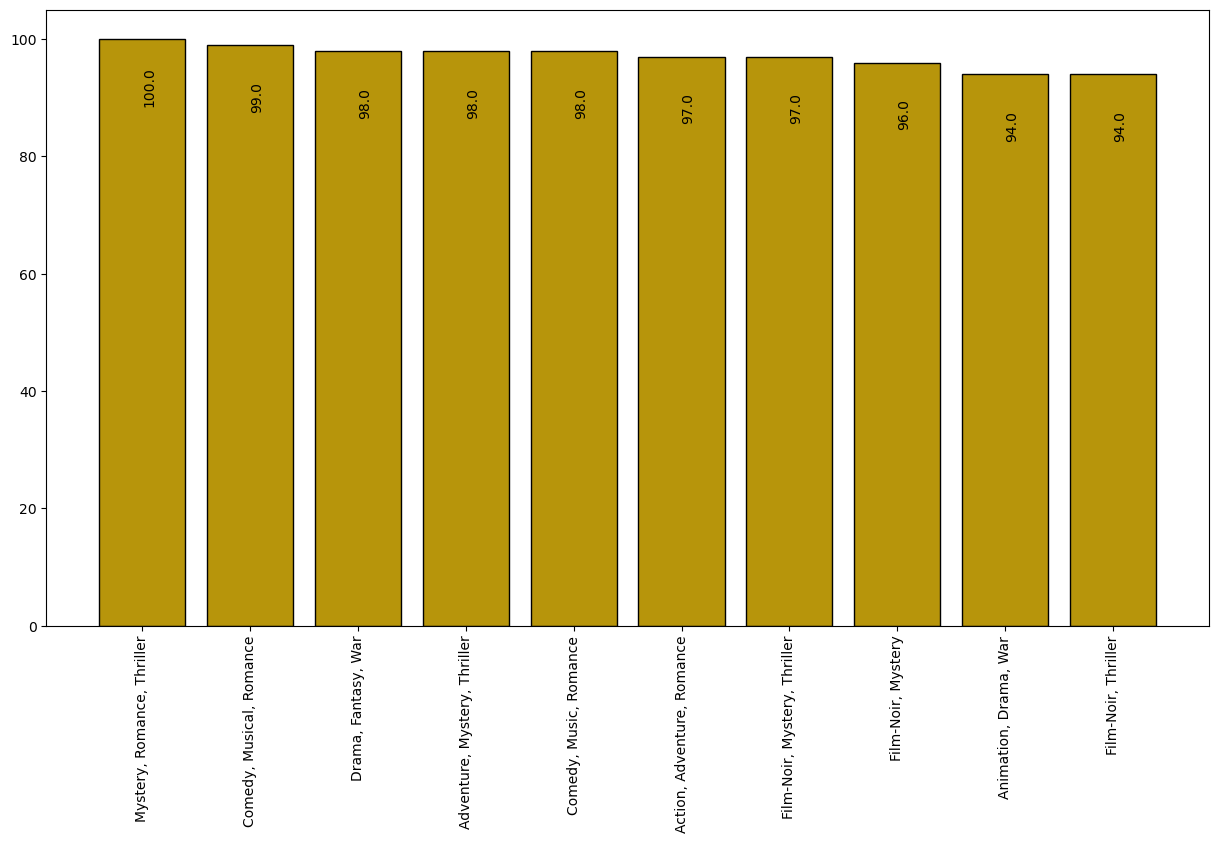

In [413]:
plt.figure(figsize=(15,8))
plt.bar(top_rates['Genre'],top_rates['Meta_score'],color='#B7950B',edgecolor='black' )
plt.xticks(rotation='vertical')
for k,v in top_rates['Meta_score'].items():
    plt.text(k,v-11,str(v),rotation=90)

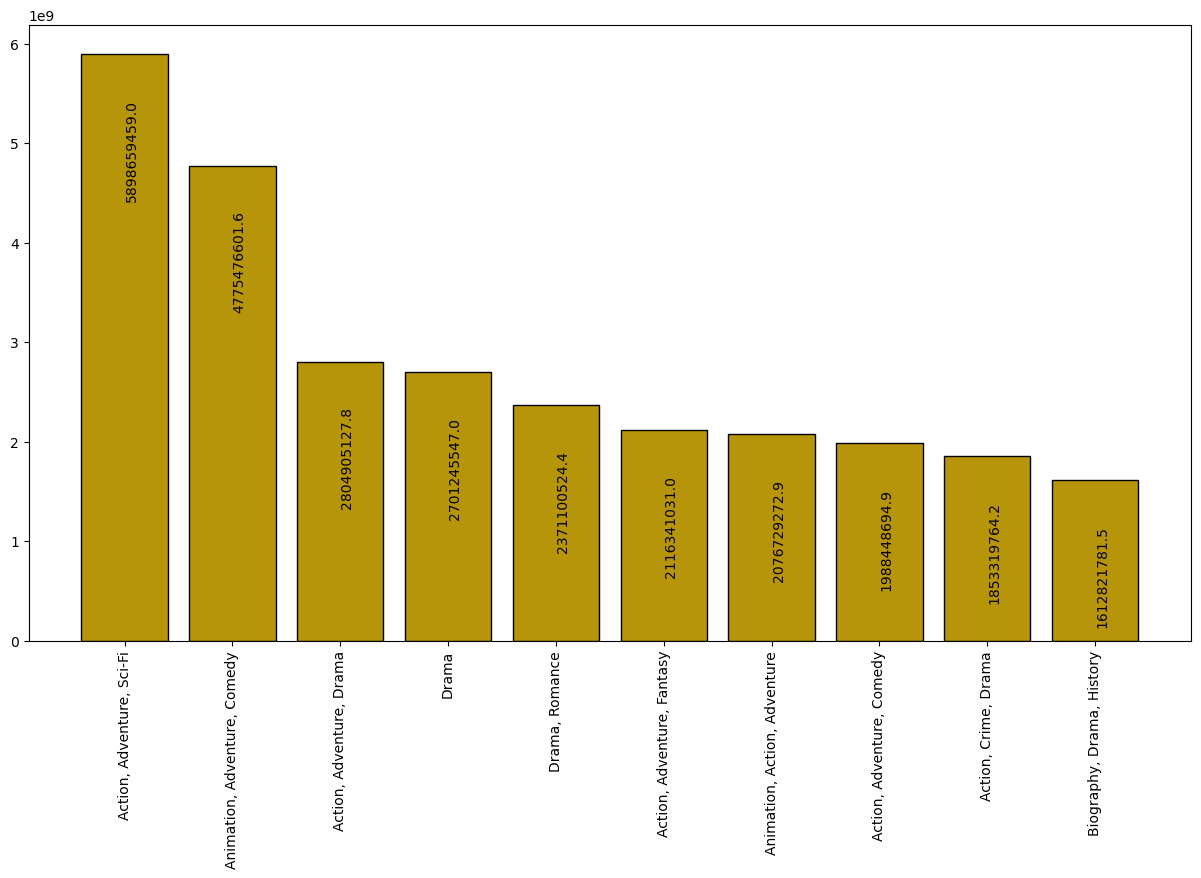

In [416]:
top_earn = imdb_data.groupby('Genre').sum().sort_values('Gross',ascending=False).head(10)
top_earn=top_earn[['Gross']]
top_earn.reset_index(inplace=True)

plt.figure(figsize=(15,8))
plt.bar(top_earn['Genre'],top_earn['Gross'],color='#B7950B',edgecolor='black')
plt.xticks(rotation='vertical')
for k,v in top_earn['Gross'].items():
    plt.text(k,v-1450000000,str(v),rotation=90)

Movies whose genre 'Action,Adventure ,Sci-Fi' achieve the most earnings

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  


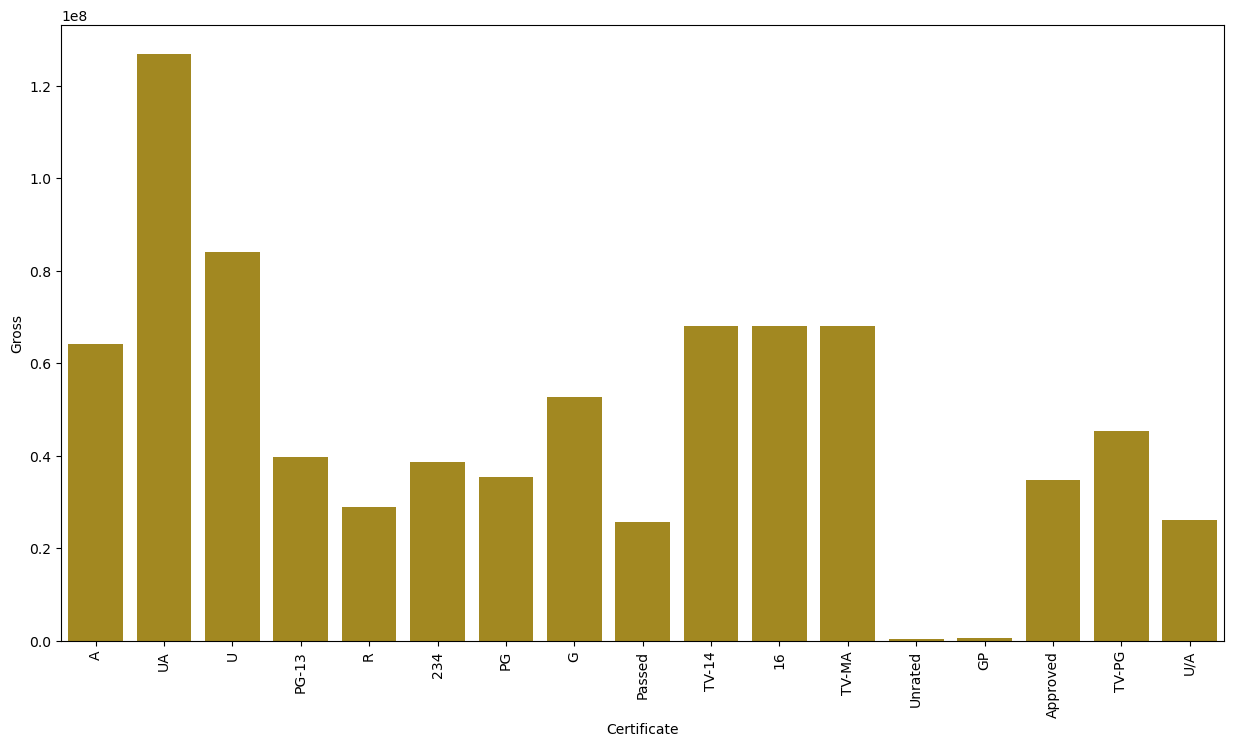

In [422]:
plt.figure(figsize=(15,8))
sns.barplot(x='Certificate',y='Gross',color='#B7950B',data=imdb_data,ci=False)
plt.xticks(rotation='vertical')
plt.show();

Movies whose certificates 'UA' acheived more earnings

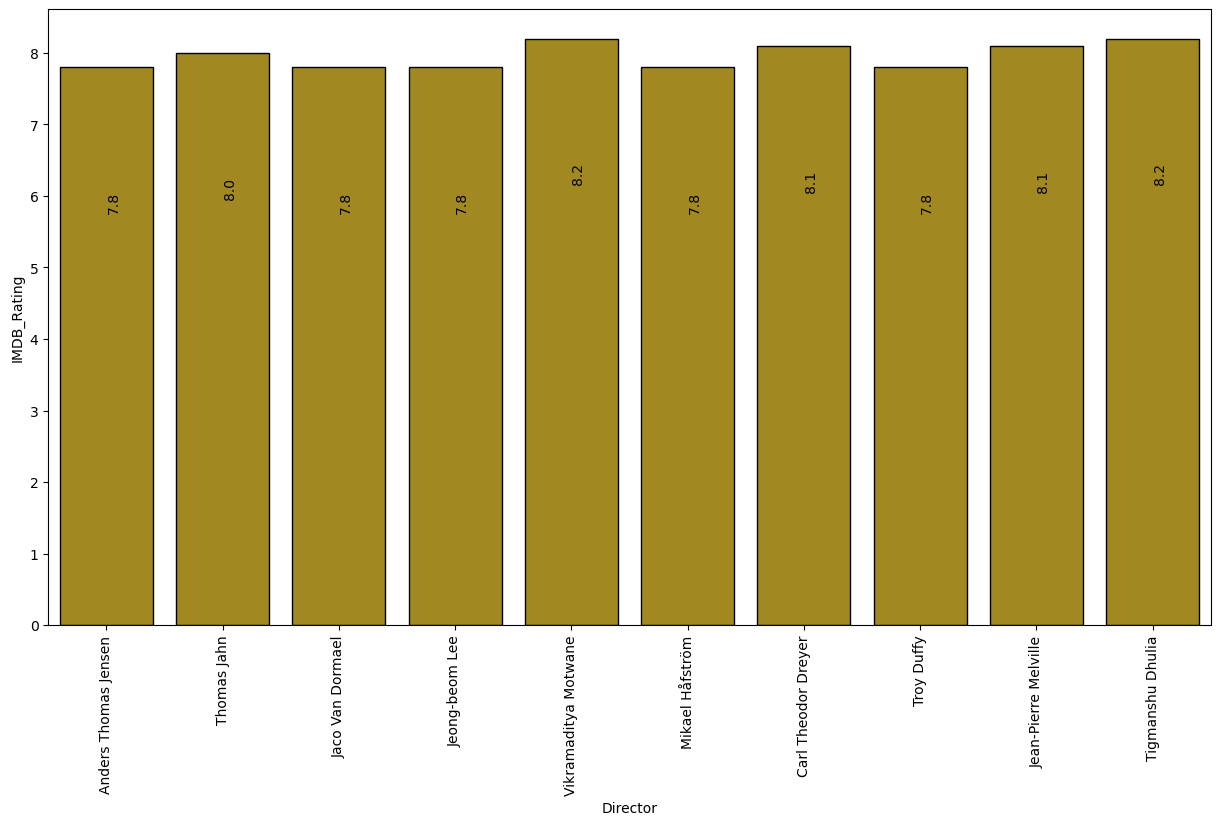

In [424]:
top_director=imdb_data.groupby('Director').mean().sort_values('Gross').head(10)
top_director=top_director[['IMDB_Rating']]
top_director.reset_index(inplace=True)

plt.figure(figsize=(15,8))
sns.barplot(x='Director',y='IMDB_Rating',data=top_director,color='#B7950B',edgecolor='black')
plt.xticks(rotation='vertical')

for k,v in top_director['IMDB_Rating'].items():
    plt.text(k,v-2,str(v),rotation=90)

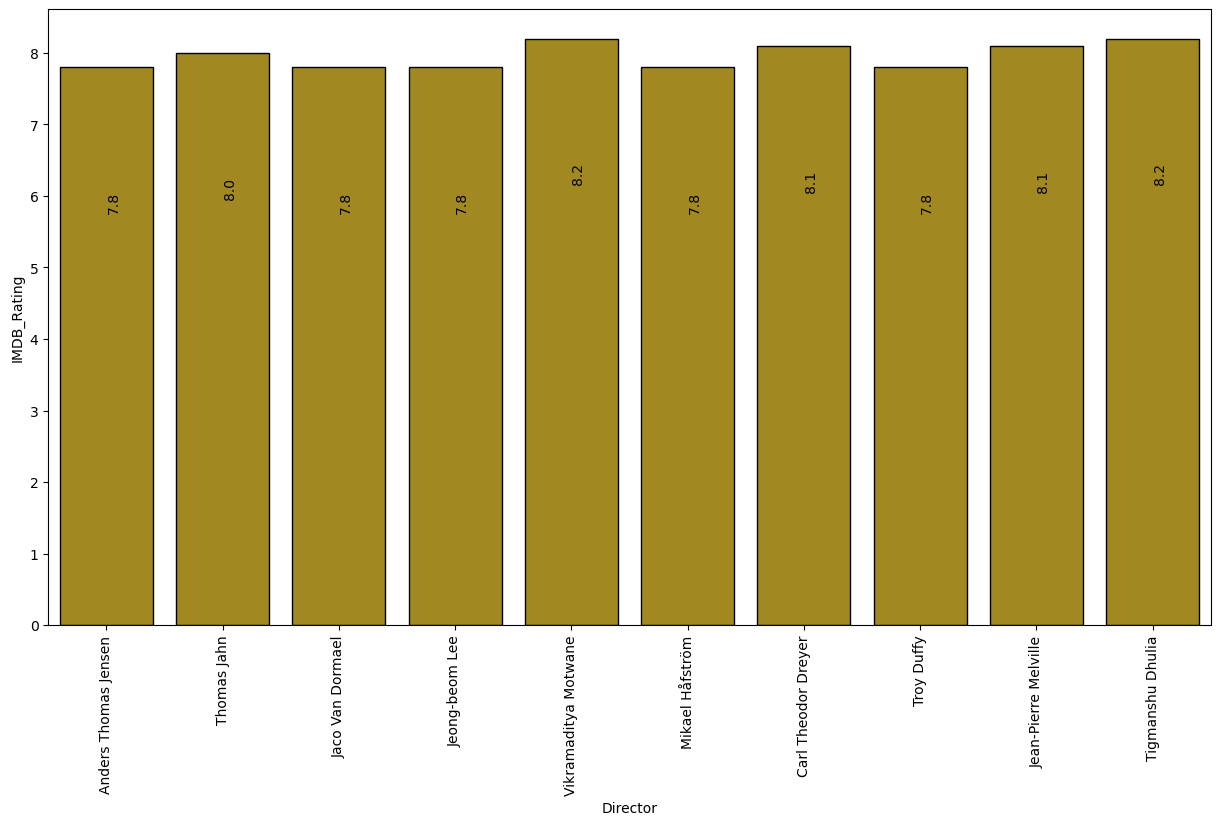

In [427]:
top_director=imdb_data.groupby('Director').mean().sort_values('Gross').head(10)
top_director=top_director[['IMDB_Rating']]
top_director.reset_index(inplace=True)

plt.figure(figsize=(15,8))
sns.barplot(x='Director',y='IMDB_Rating',data=top_director,color='#B7950B',edgecolor='black')
plt.xticks(rotation='vertical')

for k,v in top_director['IMDB_Rating'].items():
    plt.text(k,v-2,str(v),rotation=90)

The directors 'Tigmanshu Dhulia','Vikramaditya Motwane  achieved the most high imdb rates